In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df = pd.read_csv(r"C:\Users\asus\Downloads\QVI_data.csv")

In [5]:
# Calculate total sales by Premium Customer (Affluence)
affluence_sales = df.groupby('PREMIUM_CUSTOMER')['TOT_SALES'].sum().reset_index()
affluence_sales = affluence_sales.sort_values('TOT_SALES', ascending=False)


C:\Users\asus\AppData\Local\Temp\ipykernel_23884\545581944.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=affluence_sales, x='PREMIUM_CUSTOMER', y='TOT_SALES', palette=colors)


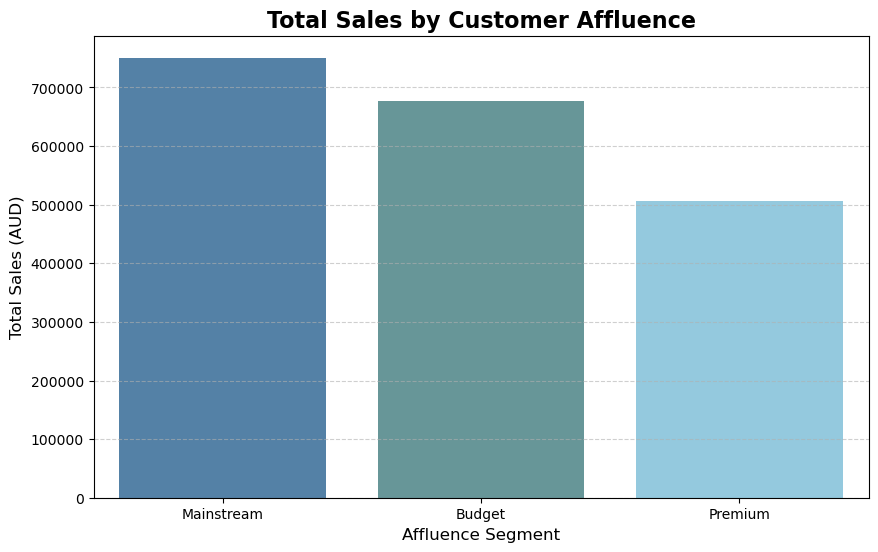

In [6]:
# Create a clean column graph
plt.figure(figsize=(10, 6))
colors = ['#4682B4', '#5F9EA0', '#87CEEB'] # Professional blue tones
sns.barplot(data=affluence_sales, x='PREMIUM_CUSTOMER', y='TOT_SALES', palette=colors)
plt.title('Total Sales by Customer Affluence', fontsize=16, fontweight='bold')
plt.xlabel('Affluence Segment', fontsize=12)
plt.ylabel('Total Sales (AUD)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)

In [7]:
# Save the plot
plt.savefig('sales_by_affluence_column_graph.png')

<Figure size 640x480 with 0 Axes>

In [8]:
# Print data to help with commentary
print(affluence_sales)

  PREMIUM_CUSTOMER  TOT_SALES
1       Mainstream  750744.50
0           Budget  676211.55
2          Premium  506158.95


In [9]:
# Calculate the count of unique customers per Lifestage and Affluence (Premium Customer)
customer_counts = df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].nunique().reset_index()

In [10]:
# Calculate total unique customers
total_customers = customer_counts['LYLTY_CARD_NBR'].sum()

In [11]:
# Calculate proportions
customer_counts['Proportion'] = customer_counts['LYLTY_CARD_NBR'] / total_customers


In [12]:
# Pivot for a heatmap or easier plotting
pivot_df = customer_counts.pivot(index='LIFESTAGE', columns='PREMIUM_CUSTOMER', values='Proportion')

<Figure size 1200x800 with 0 Axes>

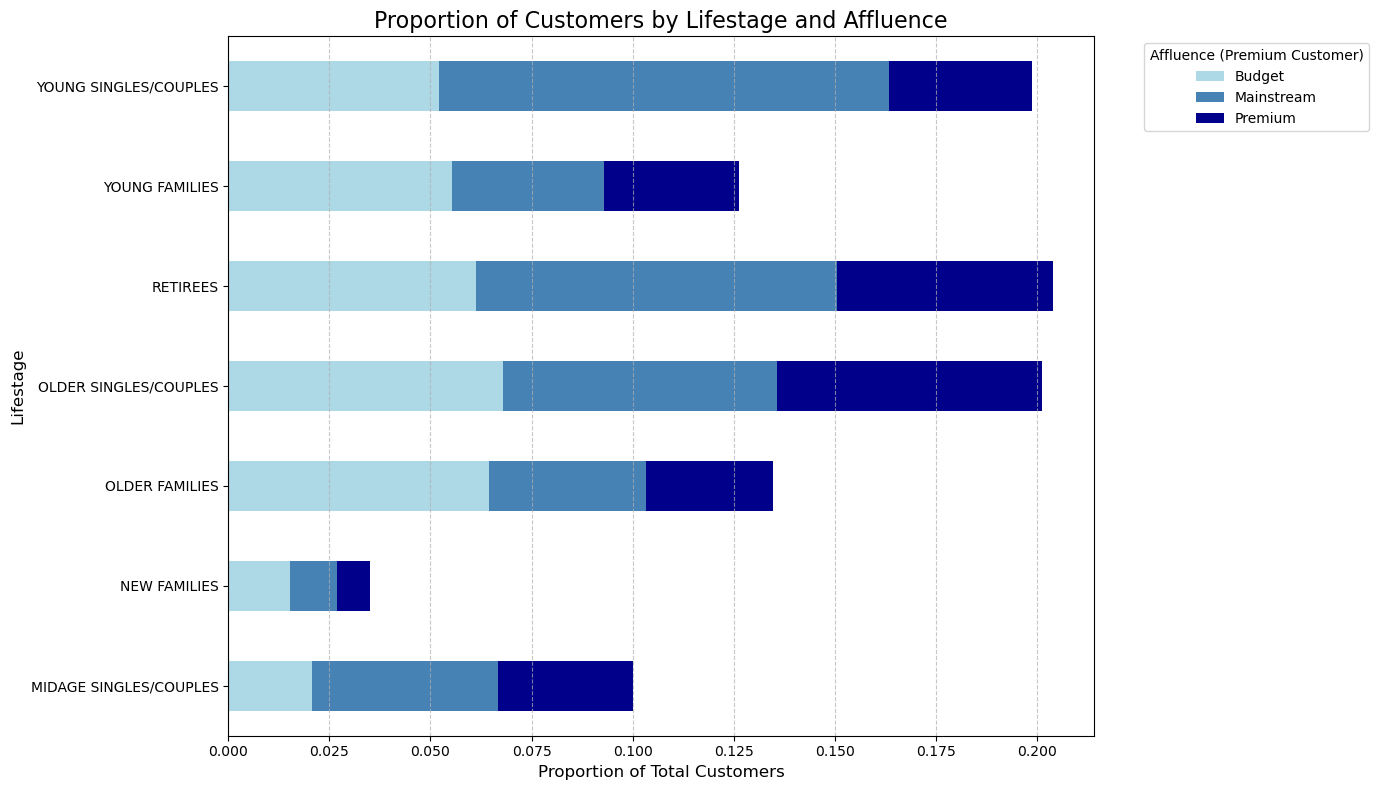

In [14]:
# Create a stacked bar chart for better visualization of proportions
plt.figure(figsize=(12, 8))
pivot_df.plot(kind='barh', stacked=True, figsize=(14, 8), color=['#ADD8E6', '#4682B4', '#00008B'])
plt.title('Proportion of Customers by Lifestage and Affluence', fontsize=16)
plt.xlabel('Proportion of Total Customers', fontsize=12)
plt.ylabel('Lifestage', fontsize=12)
plt.legend(title='Affluence (Premium Customer)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()


In [15]:
plt.savefig('customer_proportion_by_affluence_lifestage.png')
print(customer_counts.sort_values(by='Proportion', ascending=False))


                 LIFESTAGE PREMIUM_CUSTOMER  LYLTY_CARD_NBR  Proportion
19   YOUNG SINGLES/COUPLES       Mainstream            8088    0.111350
13                RETIREES       Mainstream            6479    0.089198
10   OLDER SINGLES/COUPLES       Mainstream            4930    0.067873
9    OLDER SINGLES/COUPLES           Budget            4929    0.067859
11   OLDER SINGLES/COUPLES          Premium            4750    0.065395
6           OLDER FAMILIES           Budget            4675    0.064362
12                RETIREES           Budget            4454    0.061319
15          YOUNG FAMILIES           Budget            4017    0.055303
14                RETIREES          Premium            3872    0.053307
18   YOUNG SINGLES/COUPLES           Budget            3779    0.052027
1   MIDAGE SINGLES/COUPLES       Mainstream            3340    0.045983
7           OLDER FAMILIES       Mainstream            2831    0.038975
16          YOUNG FAMILIES       Mainstream            2728    0

<Figure size 640x480 with 0 Axes>

In [16]:
df = pd.read_csv(r"C:\Users\asus\Downloads\QVI_data.csv")
df['DATE'] = pd.to_datetime(df['DATE'])
df['YEAR_MONTH'] = df['DATE'].dt.to_period('M')

In [17]:
# Group by store and month to get customer counts
monthly_customers = df.groupby(['STORE_NBR', 'YEAR_MONTH'])['LYLTY_CARD_NBR'].nunique().reset_index()
monthly_customers.columns = ['STORE_NBR', 'YEAR_MONTH', 'Customer_Count']

In [18]:
# Define the stores for the successful trial (Store 88 vs Control 159)
TRIAL_STORE = 88
CONTROL_STORE = 159


In [19]:
# Filter for the relevant stores
plot_data = monthly_customers[monthly_customers['STORE_NBR'].isin([TRIAL_STORE, CONTROL_STORE])].copy()


In [20]:
# Filter for the requested period (Feb - May 2019)
# Also include pre-trial for context if needed, but user asked for "showing the raised customer numbers from Feb - May"
# I will show the full timeline to highlight the "raise" starting from Feb.
trial_start = pd.Period('2019-02', freq='M')
trial_end = pd.Period('2019-05', freq='M')


In [21]:
# Label stores
plot_data['Store_Label'] = plot_data['STORE_NBR'].apply(
    lambda x: f'Trial Store {TRIAL_STORE}' if x == TRIAL_STORE else f'Control Store {CONTROL_STORE}'
)


In [22]:
# Convert YEAR_MONTH back to datetime for plotting
plot_data['YEAR_MONTH_DT'] = plot_data['YEAR_MONTH'].dt.to_timestamp()

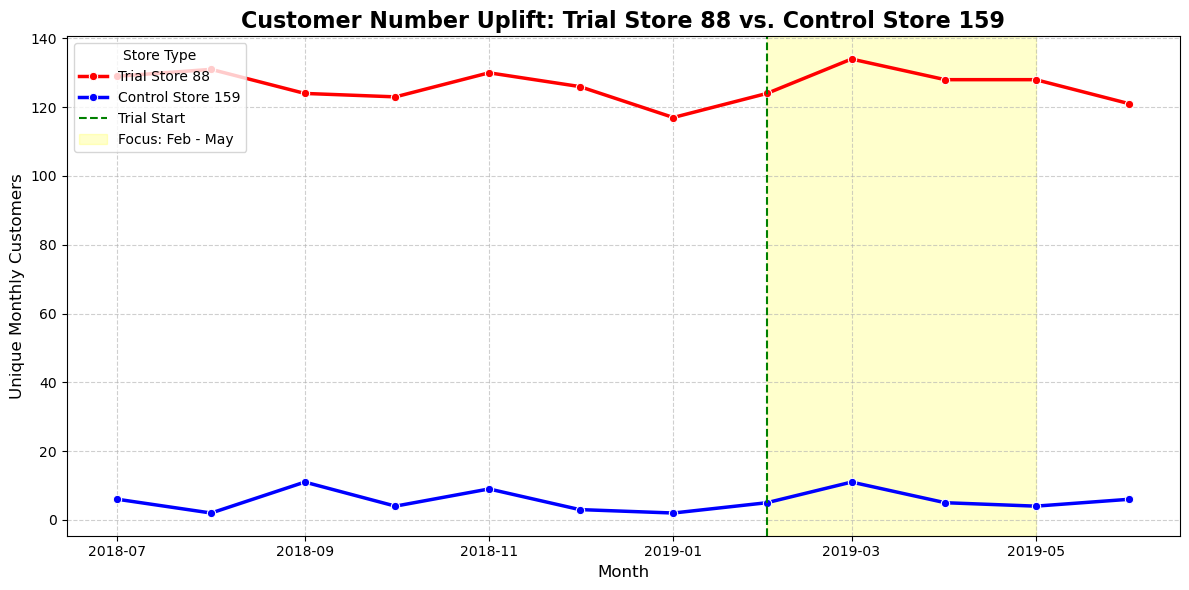

In [23]:
# Create the plot
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=plot_data,
    x='YEAR_MONTH_DT',
    y='Customer_Count',
    hue='Store_Label',
    palette=['red', 'blue'],
    marker='o',
    linewidth=2.5
)

# Vertical line for trial start
plt.axvline(pd.to_datetime('2019-02-01'), color='green', linestyle='--', label='Trial Start')

# Shade the Feb-May period as requested
plt.axvspan(pd.to_datetime('2019-02-01'), pd.to_datetime('2019-05-01'), color='yellow', alpha=0.2, label='Focus: Feb - May')

# Formatting
plt.title(f'Customer Number Uplift: Trial Store {TRIAL_STORE} vs. Control Store {CONTROL_STORE}', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Unique Monthly Customers', fontsize=12)
plt.legend(title='Store Type', loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

In [24]:
# Save image
plt.savefig('trial_customer_growth_88.png')


<Figure size 640x480 with 0 Axes>

In [26]:
# Group by store and month
monthly_sales = df.groupby(['STORE_NBR', 'YEAR_MONTH'])['TOT_SALES'].sum().reset_index()

In [27]:
# Define stores
trial_stores = [77, 86, 88]
control_stores = [11, 155, 159]

In [28]:
# Label stores
def label_store(store_nbr):
    if store_nbr in trial_stores:
        return 'Trial Stores'
    elif store_nbr in control_stores:
        return 'Control Stores'
    else:
        return 'Other Stores'

monthly_sales['Group'] = monthly_sales['STORE_NBR'].apply(label_store)

In [29]:
# Calculate averages for Trial and Control groups
overall_performance = monthly_sales[monthly_sales['Group'].isin(['Trial Stores', 'Control Stores'])]
overall_avg = overall_performance.groupby(['Group', 'YEAR_MONTH'])['TOT_SALES'].mean().reset_index()